# Analysis of Generative AI Use Survey

## Imports & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
surv_df = pd.read_excel('results/survey/responses.xlsx')
surv_df.head()

,ID,Start time,Completion time,Email,Name,Last modified time,"I have read and understood the information sheet provided. I have asked any questions that I may have about the research, I understand what will happen with my data and how to withdraw from the re...",Have you used proprietary GenAI models in the past 12 months?,Can you give us a monetary estimate of the costs you have incurred for using commercial GenAI models for your SE research in the past 12 months?,"How likely are you to continue using commercial API GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)",Do you think you will be able to sustain the costs of using proprietary models in your research over time?,"How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the ''Other"" field.",Have you used any open GenAI model for other projects in the past 12 months?,Can you give us a monetary estimate of the costs you have incurred so far for using open source GenAI models for SE research in the past 12 months?\n,"How likely are you to continue using open GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)",Do you think you will be able to sustain the costs of using specialised hardware required to run open source models in your research over time?,"How do you plan to sustain these costs in the future? Select all that apply. Please, do not include any sensitive or personal information in the ""Other"" field."
0,1,2025-09-15 15:03:12,2025-09-15 15:07:32,anonymous,NaN,NaN,Yes,Yes,150$,5.0,Maybe,Academic funding (e.g. research grants);Academ...,Yes,100$,5.0,Yes,Academic funding (e.g. research grants);Academ...
1,2,2025-09-15 15:07:31,2025-09-15 15:09:17,anonymous,NaN,NaN,Yes,Yes,50,4.0,Maybe,Academic funding (e.g. research grants);Fundin...,Yes,0,5.0,Yes,Not applicable;
2,3,2025-09-15 15:00:21,2025-09-15 15:10:19,anonymous,NaN,NaN,Yes,Yes,$ 1500,4.0,Yes,Academic funding (e.g. research grants);Academ...,Yes,Hard to estimate. In the last 12 months 0€ (be...,4.0,Maybe,Academic funding (e.g. research grants);Academ...
3,4,2025-09-15 15:10:52,2025-09-15 15:12:55,anonymous,NaN,NaN,Yes,Yes,2000 USD,5.0,Maybe,Academic funding (e.g. research grants);Fundin...,Yes,0. I only deploy them on existing server and i...,5.0,Maybe,Academic funding (e.g. research grants);Academ...
4,5,2025-09-15 15:25:25,2025-09-15 15:26:33,anonymous,NaN,NaN,Yes,Yes,20,4.0,Yes,Academic funding (e.g. research grants);,No,NaN,NaN,NaN,NaN


In [3]:
SURV_QUESTIONS = [
 'I have read and understood\xa0the information sheet provided. I have asked any questions that I may have about the research, I understand what will happen with my data and how to withdraw from the re...',
 'Have you used proprietary GenAI models in the past 12 months?',
 'Can you give us a monetary estimate of the costs you have incurred for using commercial GenAI models for your SE research in the past 12 months?',
 'How likely are you to continue using commercial API GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)',
 'Do you think you will be able to sustain the costs of using proprietary models in your research over time?',
 'How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the \'\'Other" field.',
 'Have you used any open GenAI model for other projects in the past 12 months?',
 'Can you give us a monetary estimate of the costs you have incurred so far for using open source GenAI models for SE research in the past 12 months?\n',
 'How likely are you to continue using open GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)',
 'Do you think you will be able to sustain the costs of using specialised hardware required to run open source models in your research over time?',
 'How do you plan to sustain these costs in the future?\xa0Select all that apply.\xa0Please, do not include any sensitive or personal information in the "Other" field.'
]

In [14]:
# Pie Chart Function
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')
    plt.show()


def plot_likert_stacked_bar(data, question_col, title=None, labels=None, colors=None):
    """
    Plot a stacked horizontal bar chart for Likert scale responses.
    
    Parameters:
    - data: DataFrame containing the survey data
    - question_col: Column name containing Likert scale responses
    - title: Chart title (optional)
    - labels: Custom labels for the scale (optional)
    - colors: Custom colors for each scale level (optional)
    """
    # Count responses for each scale level
    counts = data[question_col].value_counts().sort_index()
    
    # Fixed color mapping for Likert scale 1-5 (red to green)
    likert_colors = {
        1: '#d73027',  # Red (strongly disagree/negative)
        2: '#fc8d59',  # Orange-red
        3: '#fee08b',  # Yellow (neutral)
        4: '#91cf60',  # Light green
        5: "#00810f"   # Blue-green (strongly agree/positive)
    }
    
    # Use fixed colors based on scale values, fallback to provided colors or default
    if colors is None:
        colors = [likert_colors.get(scale, '#cccccc') for scale in counts.index]
    
    # Calculate percentages
    total = counts.sum()
    percentages = (counts / total * 100).round(1)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create stacked bar
    left = 0
    bars = []
    for i, (scale, count) in enumerate(counts.items()):
        bar = ax.barh(0, count, left=left, color=colors[i], 
                     label=f'{scale} ({percentages.iloc[i]}%)')
        bars.append(bar)
        left += count
    
    # Customize chart
    ax.set_xlim(0, total)
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel('Number of Responses')
    ax.set_yticks([])
    
    if title:
        ax.set_title(title, wrap=True, fontsize=12, pad=20)
    
    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on bars
    cumulative = 0
    for i, (scale, count) in enumerate(counts.items()):
        if count > 0:  # Only add label if there are responses
            ax.text(cumulative + count/2, 0, f'{count}', 
                   ha='center', va='center', fontweight='bold', color='white')
        cumulative += count
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax


def count_multi_select_responses(series):
    all_responses = []
    
    # Iterate through each row and split by semicolon
    for response in series.dropna():
        if isinstance(response, str):
            # Split by semicolon and clean up whitespace
            individual_responses = [r.strip() for r in response.split(';')]
            all_responses.extend([x for x in individual_responses if x != ''])
    
    # Count frequencies and return as Series
    return pd.Series(all_responses).value_counts()


def plot_multi_select_bar(counts, title=None):
    """
    Plot a horizontal bar chart for multi-select response counts.
    
    Parameters:
    - counts: pandas Series with response counts (from count_multi_select_responses)
    - title: Chart title (optional)
    """
    # Create figure
    fig, ax = plt.subplots(figsize=(10, max(6, len(counts) * 0.4)))
    
    # Create horizontal bars
    bars = ax.barh(range(len(counts)), counts.values, color=plt.cm.Set3(range(len(counts))))
    
    # Customize chart
    ax.set_yticks(range(len(counts)))
    ax.set_yticklabels(counts.index)
    ax.set_xlabel('Frequency of Selection')
    ax.invert_yaxis()  # Top to bottom ordering
    
    if title:
        ax.set_title(title, wrap=True, fontsize=12, pad=20)
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, counts.values)):
        ax.text(bar.get_width() + max(counts) * 0.01, bar.get_y() + bar.get_height()/2, 
               f'{count}', ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

In [5]:
Q_DICT = {
 'I have read and understood\xa0the information sheet provided. I have asked any questions that I may have about the research, I understand what will happen with my data and how to withdraw from the re...': 'bool',
 'Have you used proprietary GenAI models in the past 12 months?': 'bool',
 'Can you give us a monetary estimate of the costs you have incurred for using commercial GenAI models for your SE research in the past 12 months?': 'text',
 'How likely are you to continue using commercial API GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)': 'likert',
 'Do you think you will be able to sustain the costs of using proprietary models in your research over time?': 'multi',
 'How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the \'\'Other" field.': 'multi',
 'Have you used any open GenAI model for other projects in the past 12 months?': 'bool',
 'Can you give us a monetary estimate of the costs you have incurred so far for using open source GenAI models for SE research in the past 12 months?\n': 'text',
 'How likely are you to continue using open GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)': 'likert',
 'Do you think you will be able to sustain the costs of using specialised hardware required to run open source models in your research over time?': 'multi',
 'How do you plan to sustain these costs in the future?\xa0Select all that apply.\xa0Please, do not include any sensitive or personal information in the "Other" field.': 'multi'
}

## Commercial vs. Open-Source

### Current & Past Usage

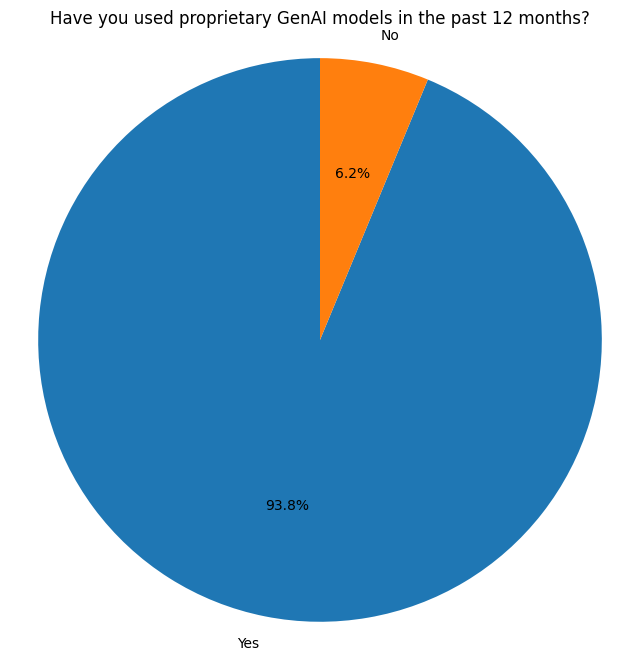

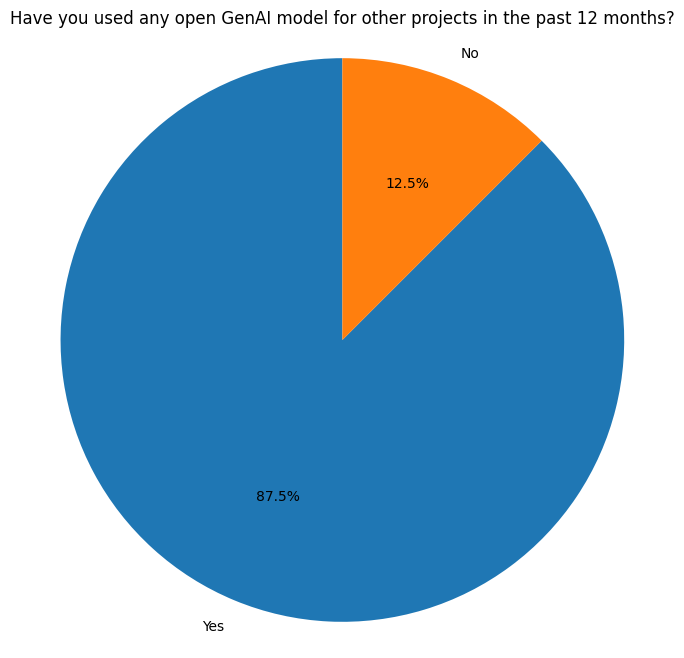

In [6]:
questions = [
    'Have you used proprietary GenAI models in the past 12 months?',
    'Have you used any open GenAI model for other projects in the past 12 months?'
]

for question in questions:
    counts = surv_df[question].value_counts()
    plot_pie_chart(counts, title=question)

### Future Usage

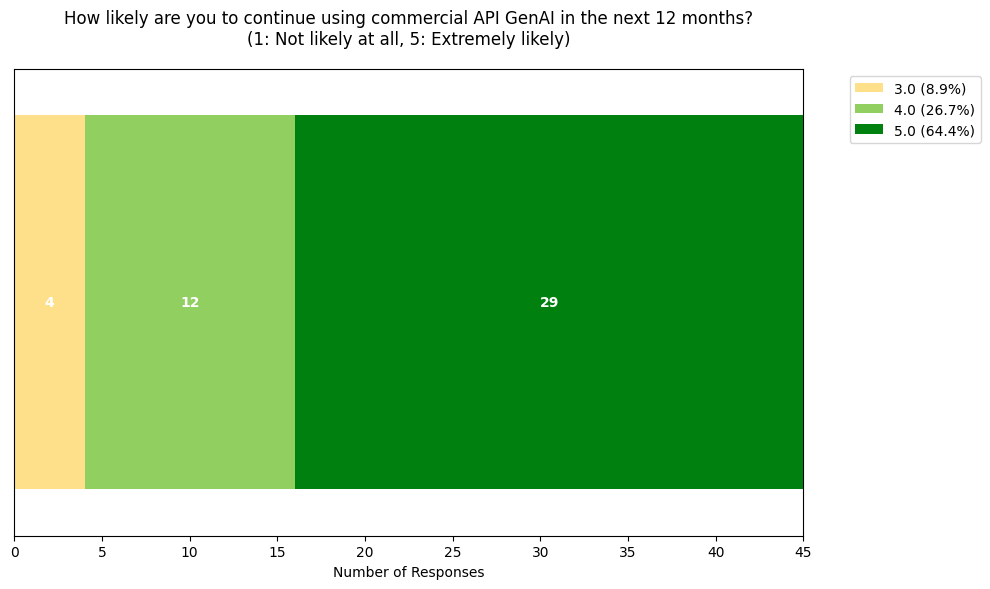

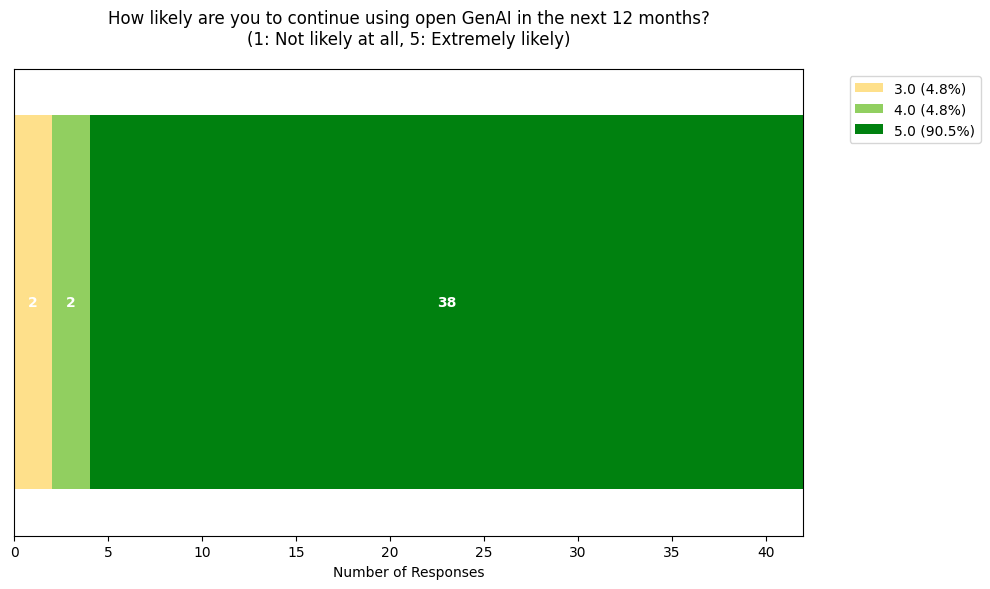

In [15]:
questions = [
    'How likely are you to continue using commercial API GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)',
    'How likely are you to continue using open GenAI in the next 12 months?\n(1: Not likely at all, 5: Extremely likely)',
]

for question in questions:
    plot_likert_stacked_bar(surv_df, question, title=question)

### Costs

In [8]:
questions = [
    'Can you give us a monetary estimate of the costs you have incurred for using commercial GenAI models for your SE research in the past 12 months?',
    'Can you give us a monetary estimate of the costs you have incurred so far for using open source GenAI models for SE research in the past 12 months?\n'
]

print("Commercial Answers:")
print(surv_df[questions[0]].value_counts())
print("\n\nOpen Source Answers:")
print(surv_df[questions[1]].value_counts())

Commercial Answers:
Can you give us a monetary estimate of the costs you have incurred for using commercial GenAI models for your SE research in the past 12 months?
2000 USD                                                                           2
500 USD                                                                            2
100                                                                                2
200 USD                                                                            2
$50                                                                                2
50                                                                                 1
150$                                                                               1
200 EUR                                                                            1
> 50,000 USD (covered by companies like Microsoft, ByteDance, etc.)                1
20                                                                    

### Future Costs

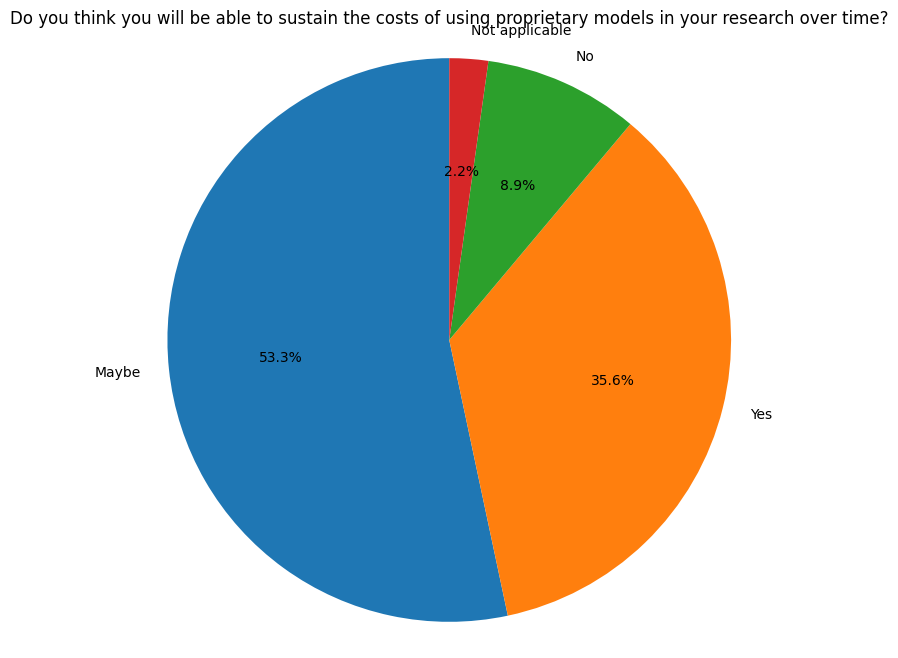

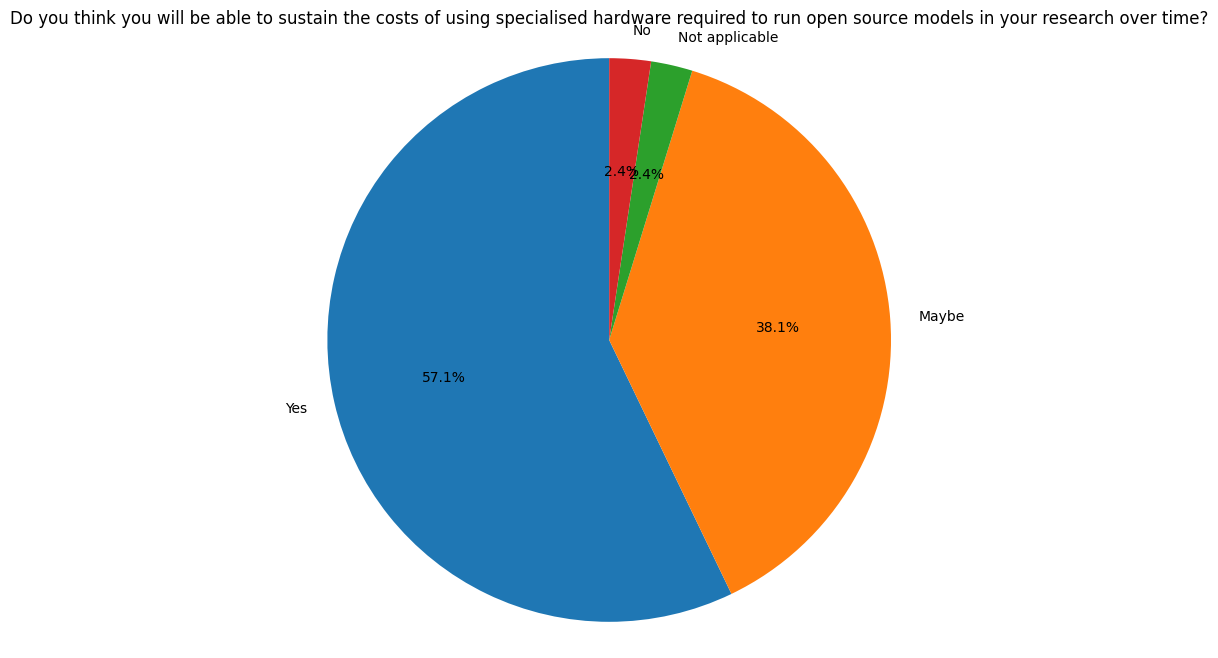

In [9]:
questions = [
    'Do you think you will be able to sustain the costs of using proprietary models in your research over time?',
    'Do you think you will be able to sustain the costs of using specialised hardware required to run open source models in your research over time?'
]

for question in questions:
    plot_pie_chart(surv_df[question].value_counts(), title=question)

In [10]:
surv_df['How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the \'\'Other" field.'].value_counts()


How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the ''Other" field.
Academic funding (e.g. research grants);Academic institutional support (e.g. university funding);Funding from industry (e.g., via industrial collaboration, free credits);                     10
Academic funding (e.g. research grants);                                                                                                                                                        6
Academic funding (e.g. research grants);Funding from industry (e.g., via industrial collaboration, free credits);                                                                               5
Academic funding (e.g. research grants);Academic institutional support (e.g. university funding);                                                                                               4
Personal funding;                                               

Commercial Answers:
Academic funding (e.g. research grants)                                     36
Academic institutional support (e.g. university funding)                    26
Funding from industry (e.g., via industrial collaboration, free credits)    25
Personal funding                                                            14
OpenAI and Anthropic have the research grant for LLM-related research.       1
Not applicable                                                               1
Name: count, dtype: int64


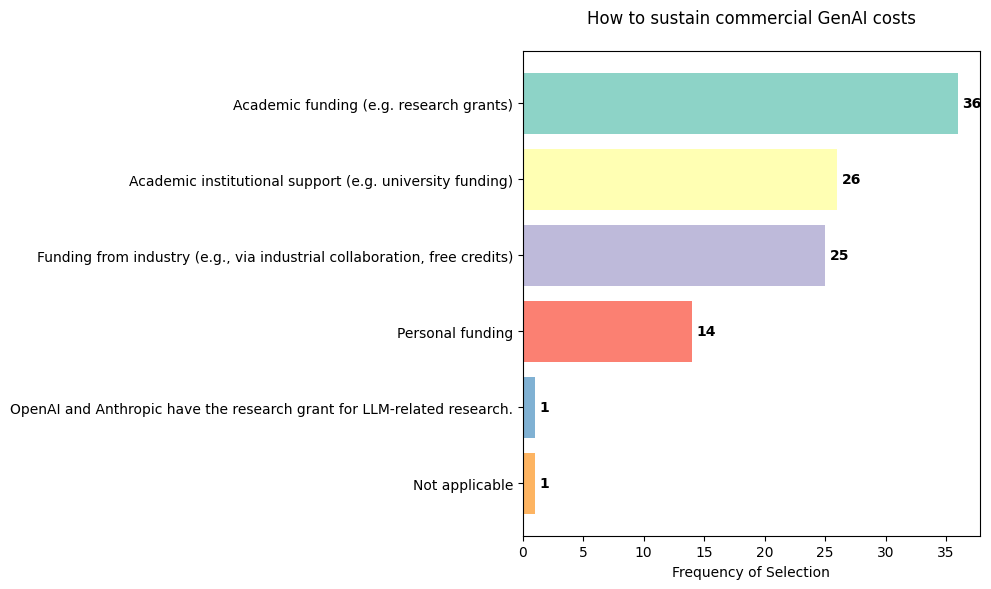



Open Source Answers:
Academic funding (e.g. research grants)                                         32
Academic institutional support (e.g. university funding)                        24
Funding from the industry (e.g., via industrial collaboration, free credits)    18
Personal funding                                                                 8
Not applicable                                                                   3
I do not know                                                                    1
reuse the models from huggingface to avoid training cost                         1
industrial research budget                                                       1
Name: count, dtype: int64


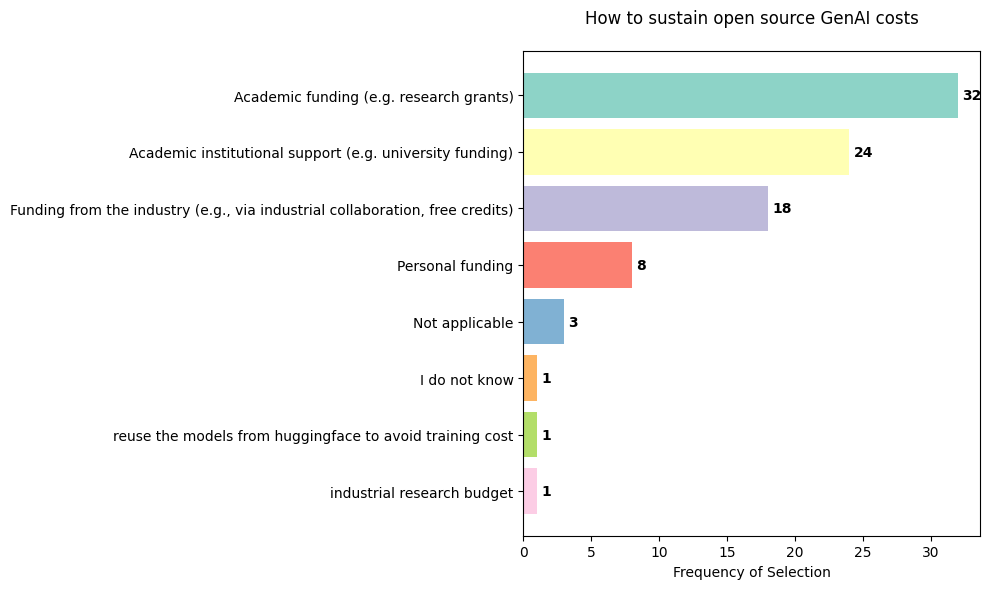

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'How to sustain open source GenAI costs'}, xlabel='Frequency of Selection'>)

In [11]:
# Update your existing code to handle multi-select questions
questions = [
     'How do you plan to sustain these costs in the future? Select all that apply. Please do not include any sensitive or personal information in the \'\'Other" field.',
     'How do you plan to sustain these costs in the future?\xa0Select all that apply.\xa0Please, do not include any sensitive or personal information in the "Other" field.'
]

print("Commercial Answers:")
commercial_counts = count_multi_select_responses(surv_df[questions[0]])
print(commercial_counts)
plot_multi_select_bar(commercial_counts, title="How to sustain commercial GenAI costs")

print("\n\nOpen Source Answers:")
open_source_counts = count_multi_select_responses(surv_df[questions[1]])
print(open_source_counts)
plot_multi_select_bar(open_source_counts, title="How to sustain open source GenAI costs")